In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
url = "https://raw.githubusercontent.com/klaytoncastro/idp-machinelearning/refs/heads/main/california/california_housing.csv"
data = pd.read_csv(url)

print("Primeiras linhas do dataset:")
print(data.head())
print("\nInformações gerais do dataset:")
print(data.info())

Primeiras linhas do dataset:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  

Informações gerais do dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  floa

In [6]:
# 2. Análise Exploratória de Dados (EDA)
# Estatísticas descritivas
print("\nEstatísticas descritivas:")
print(data.describe())

# Verificando valores ausentes
print("\nValores ausentes por coluna:")
print(data.isnull().sum())


Estatísticas descritivas:
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude   MedHouseVal  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  
min  

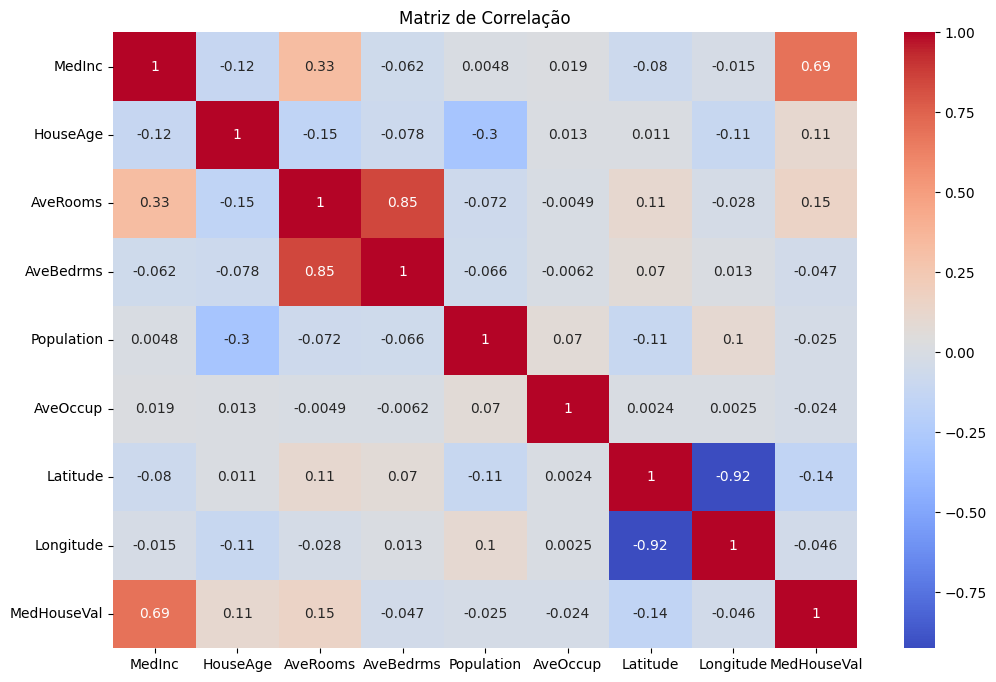

In [7]:
# Matriz de correlação
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")
plt.title("Matriz de Correlação")
plt.show()

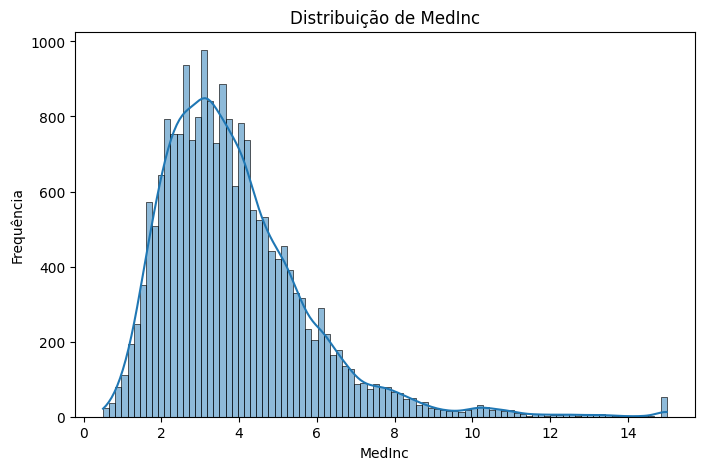

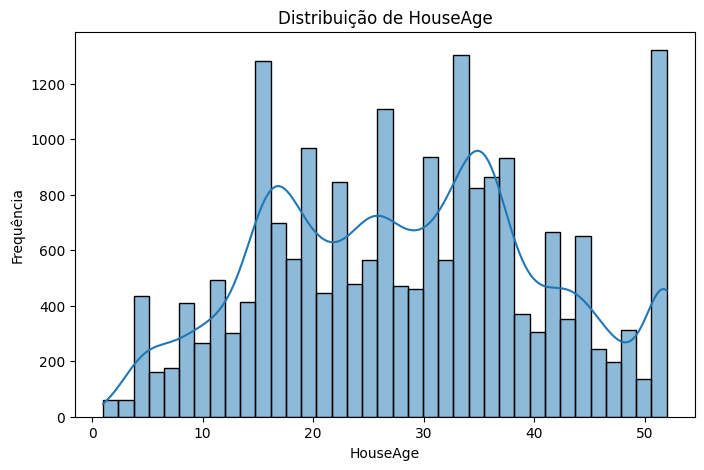

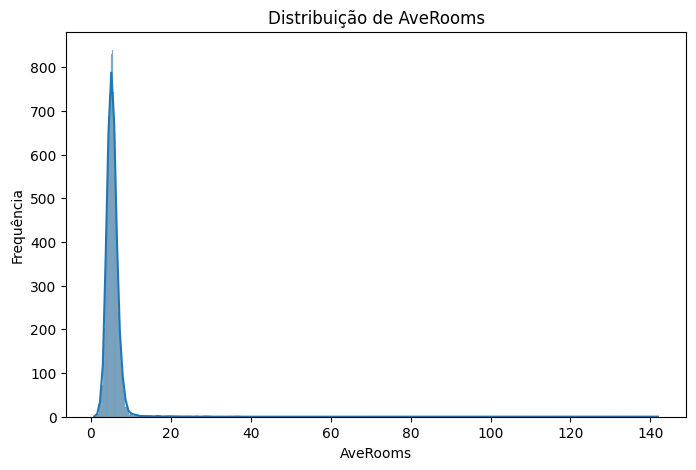

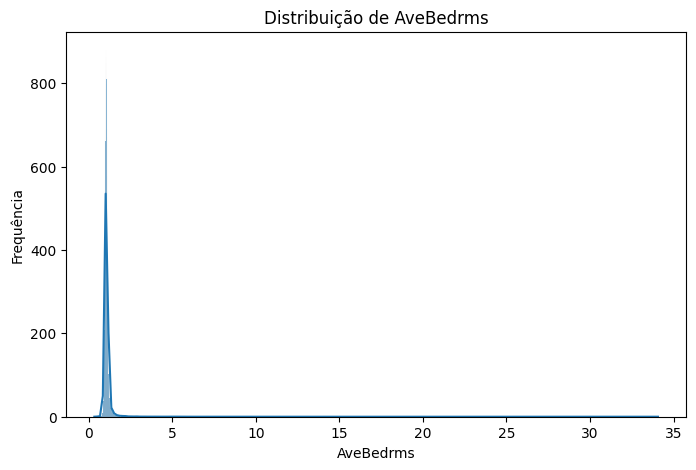

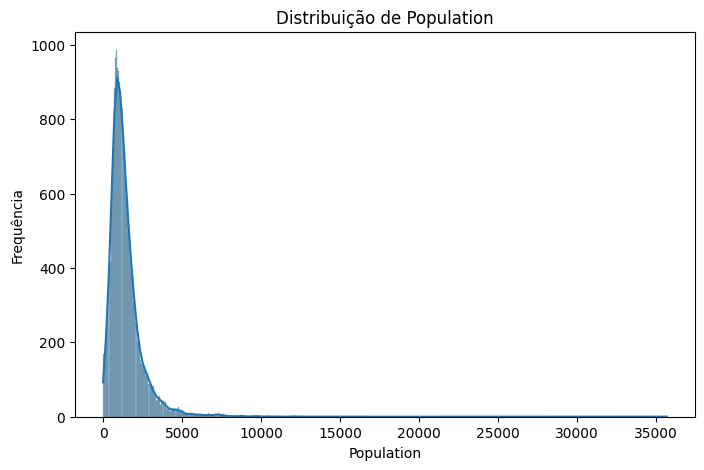

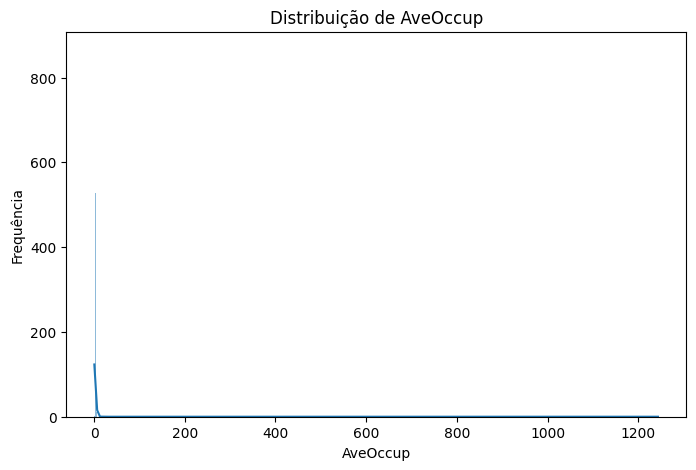

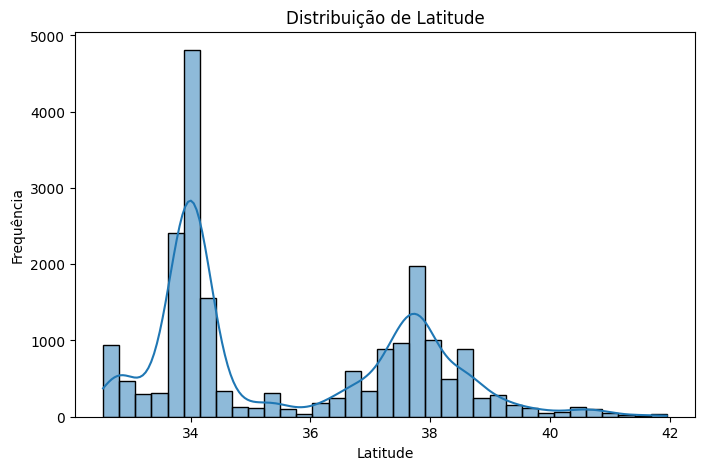

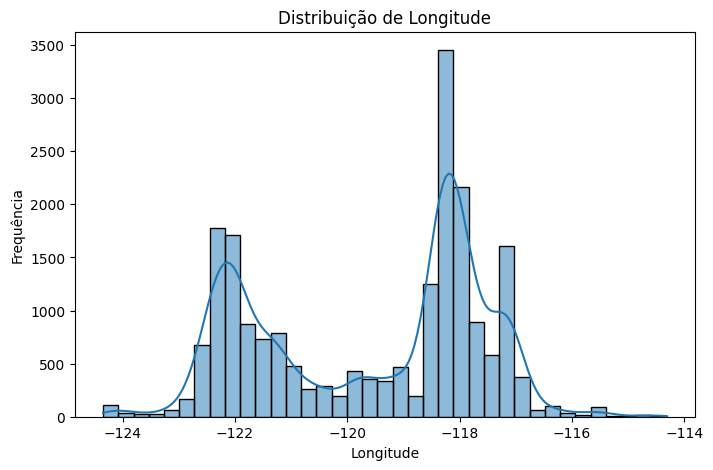

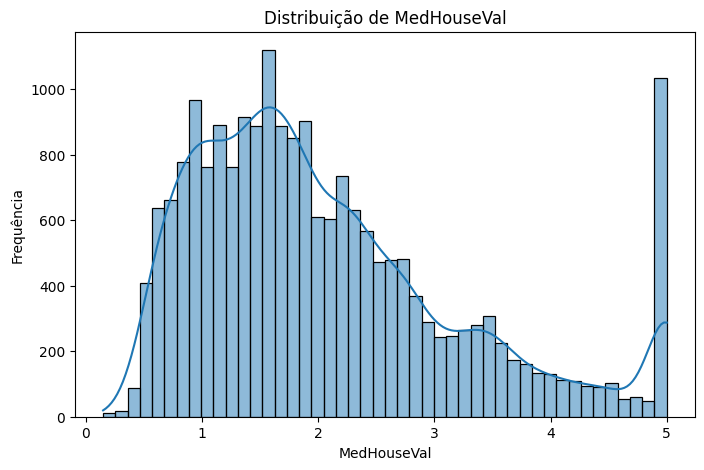

In [8]:
# Distribuições das variáveis numéricas
for col in data.columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(data[col], kde=True)
    plt.title(f"Distribuição de {col}")
    plt.xlabel(col)
    plt.ylabel("Frequência")
    plt.show()

In [9]:
# 3. Pré-processamento de Dados
# Normalização das variáveis preditoras
from sklearn.preprocessing import StandardScaler
X = data.drop(columns=["MedHouseVal"])
y = data["MedHouseVal"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Divisão dos dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [10]:
# 4. Modelagem e Avaliação
# Função para treinar, avaliar e exibir resultados dos modelos
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"Model: {model.__class__.__name__}")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"R-squared (R²): {r2:.2f}")
    print("-" * 50)

    # Gráfico de valores previstos x valores reais
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, alpha=0.7)
    plt.xlabel("Valores Reais")
    plt.ylabel("Valores Preditos")
    plt.title(f"Valores Reais x Preditos - {model.__class__.__name__}")
    plt.show()

# Modelos a serem treinados
models = [
    LinearRegression(),
    DecisionTreeRegressor(random_state=42),
    RandomForestRegressor(random_state=42),
    SVR(),
    GradientBoostingRegressor(random_state=42)
]

Model: LinearRegression
Mean Absolute Error (MAE): 0.53
Mean Squared Error (MSE): 0.56
R-squared (R²): 0.58
--------------------------------------------------


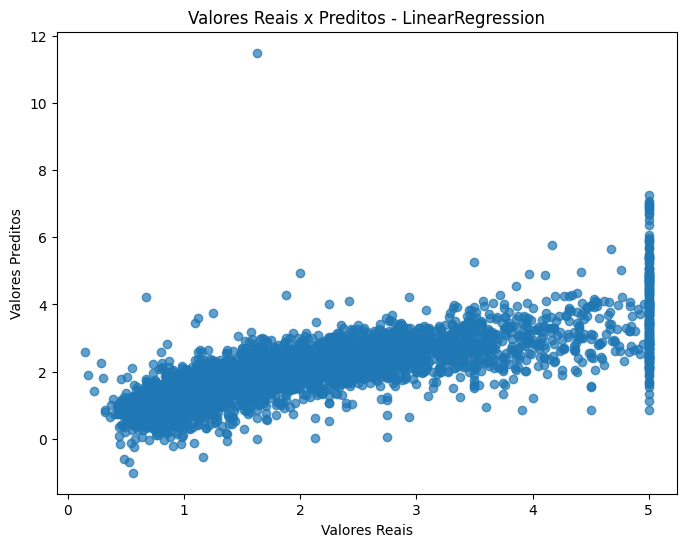

Model: DecisionTreeRegressor
Mean Absolute Error (MAE): 0.45
Mean Squared Error (MSE): 0.49
R-squared (R²): 0.62
--------------------------------------------------


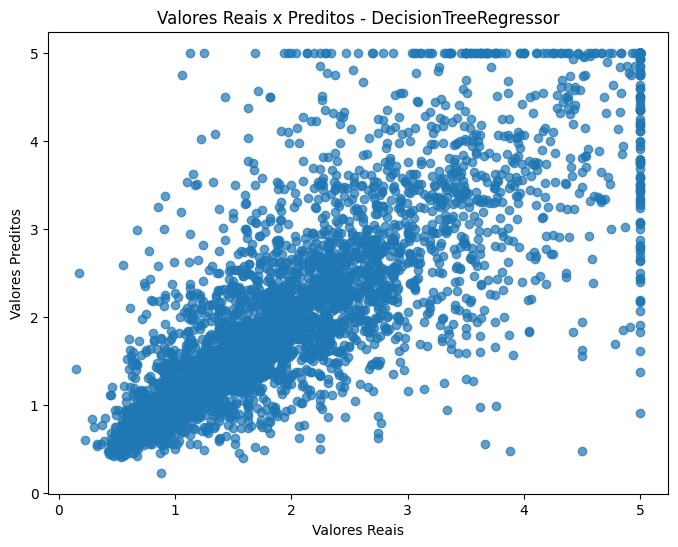

Model: RandomForestRegressor
Mean Absolute Error (MAE): 0.33
Mean Squared Error (MSE): 0.26
R-squared (R²): 0.81
--------------------------------------------------


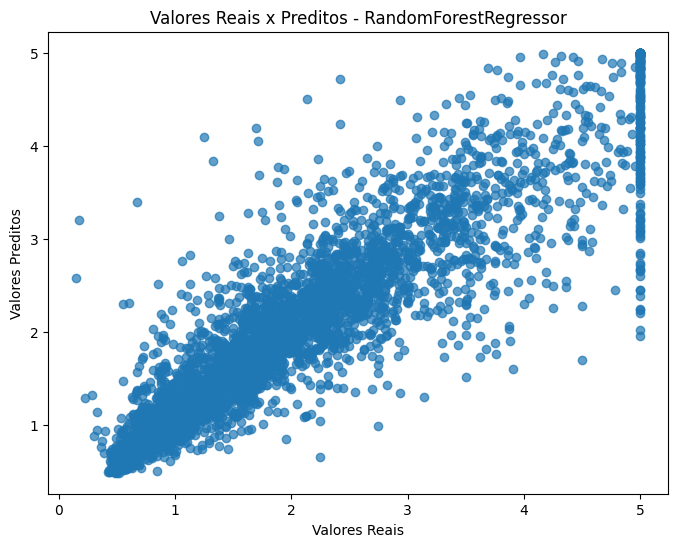

Model: SVR
Mean Absolute Error (MAE): 0.40
Mean Squared Error (MSE): 0.36
R-squared (R²): 0.73
--------------------------------------------------


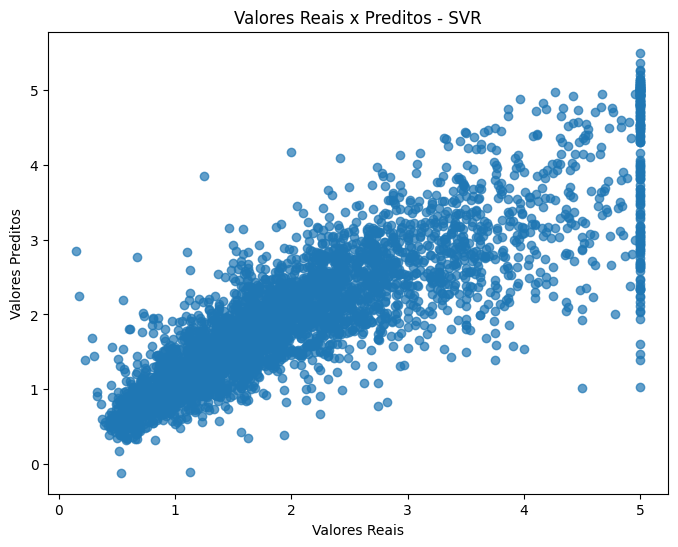

Model: GradientBoostingRegressor
Mean Absolute Error (MAE): 0.37
Mean Squared Error (MSE): 0.29
R-squared (R²): 0.78
--------------------------------------------------


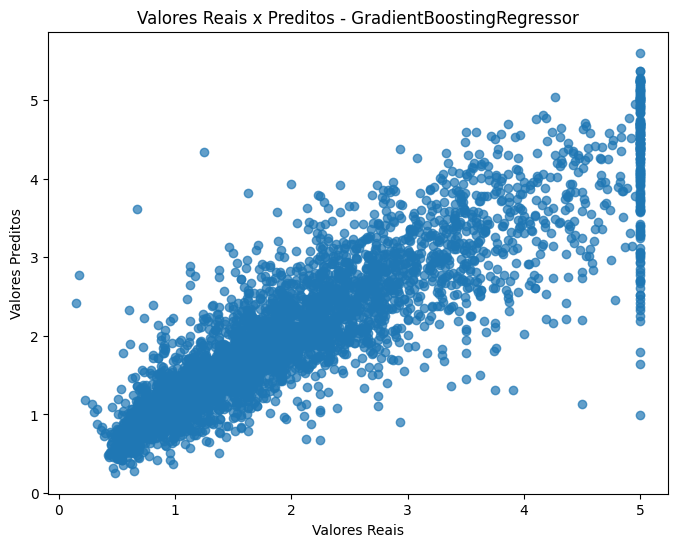

In [11]:
for model in models:
    evaluate_model(model, X_train, X_test, y_train, y_test)